# Results Visualization 
This file contains visualization of results obtained by running models_training.ipynb <br>
The produced figures show the same information as provided in the assignment sheet. 

In [1]:

from experiments.evaluation_result_container import EvaluationResultContainer
from visualization_utils import mk_bar_plot, mk_bar_plt_omit_empty
from experiments.evaluation_statistics import aggregate_by_exp_type
from experiments.metric import MetricTemplate,Flags, Metric
import matplotlib.pyplot as plt
from experiments.experiment_type import ExperimentType
import numpy as np

(4, 64)


# Experiment 1

In [2]:
E1 = EvaluationResultContainer.from_json("saved_data/eval_results/merged/E1.json")
# avrg over repetitions
E1 = aggregate_by_exp_type(E1)
# put E_1_1 to the end
E1.append_results(E1.pop(0))

Text(0.5, 0, 'Percentage of data used for training')

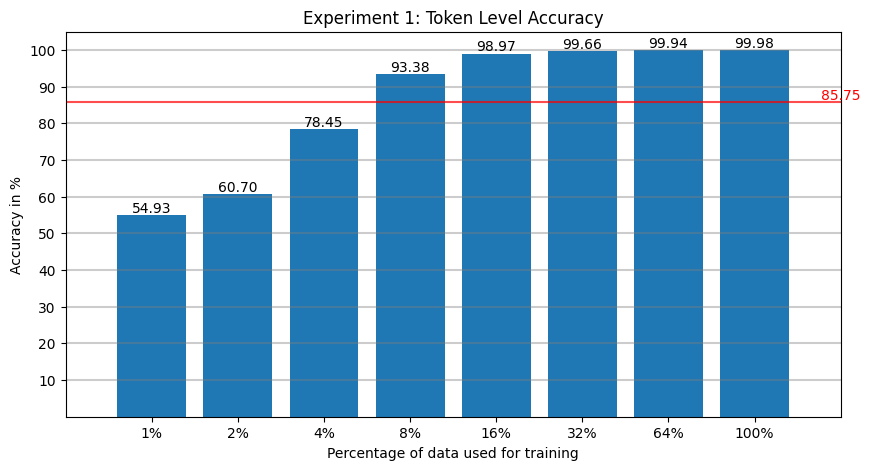

In [3]:
#TL ACC AVRG NO_ORACLE
acc_tl_avrg = MetricTemplate(flags=[
    Flags.LevelFlags.TL,
    Flags.MetricFlags.ACC,
    Flags.DistrFlags.Avrg,
    Flags.PredictionFlags.NO_ORACLE,
])

fig2, ax = plt.subplots(1, 1, figsize=(10, 5))
ms:list[Metric] = (E1*100).get_data(acc_tl_avrg)
x_lbls = ['1%','2%','4%','8%','16%','32%','64%','100%']
mk_bar_plot(ax,ms,x_lbls=x_lbls)
ax.set_title("Experiment 1: Token Level Accuracy")
ax.set_ylabel("Accuracy in %")
ax.set_xlabel("Percentage of data used for training")

# Experiment 2

In [4]:
E2 = EvaluationResultContainer.from_json("saved_data/eval_results/merged/E2.json") 
E2 = aggregate_by_exp_type(E2)

### Token Level No oracle

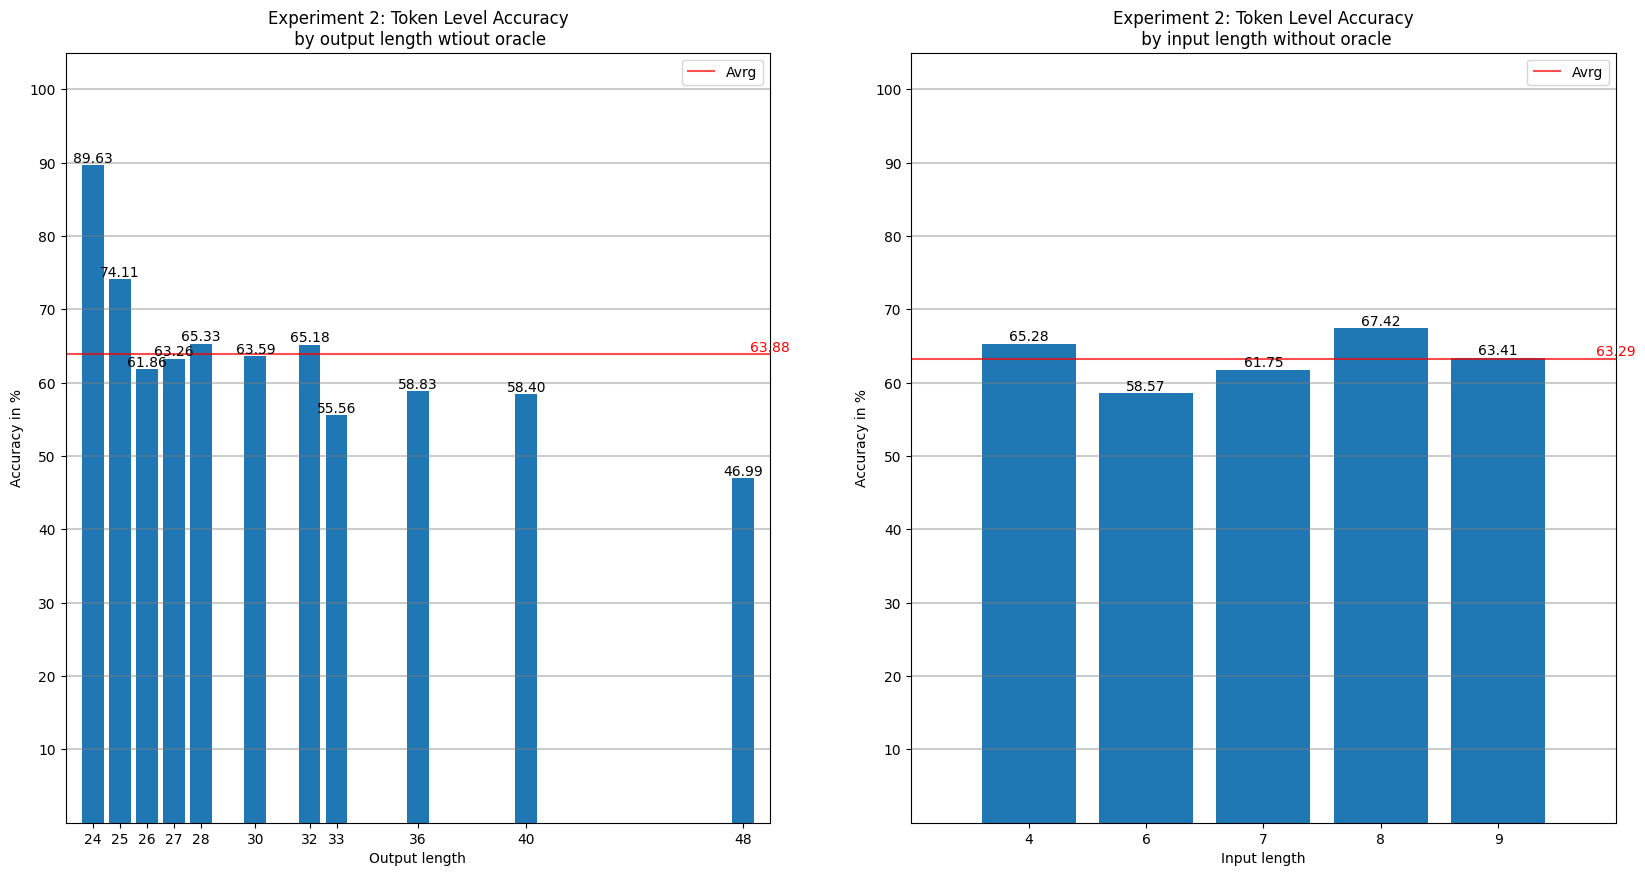

In [5]:

# ACC TL NO ORACLE OUTLEN
acc_tl_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])

fig1, axs1 = plt.subplots(1, 2, figsize=(20, 10))

data:Metric = (E2*100).get_data(acc_tl_outlen)[0]
mk_bar_plot(axs1[0],data=data, cut_trailing_zeros=True, omit_zero_lbls=True)
axs1[0].set_title("Experiment 2: Token Level Accuracy\n by output length wtiout oracle")
axs1[0].set_ylabel("Accuracy in %")
axs1[0].set_xlabel("Output length")
axs1[0].legend()

# ACC TL NO ORACLE INLEN
acc_tl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])

# TOTAL TL NO ORACLE INLEN
# used for removing empty bars in plots
tot_tl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])


data:Metric = (E2*100).get_data(acc_tl_inlen)[0]
total:Metric = E2.get_data(tot_tl_inlen)[0]
mk_bar_plt_omit_empty(axs1[1],data_metric=data,total_metric=total, cut_trailing_zeros=True)
axs1[1].set_title("Experiment 2: Token Level Accuracy\n by input length without oracle")
axs1[1].set_ylabel("Accuracy in %")
axs1[1].set_xlabel("Input length")
axs1[1].legend()




### Token Level With Oracle

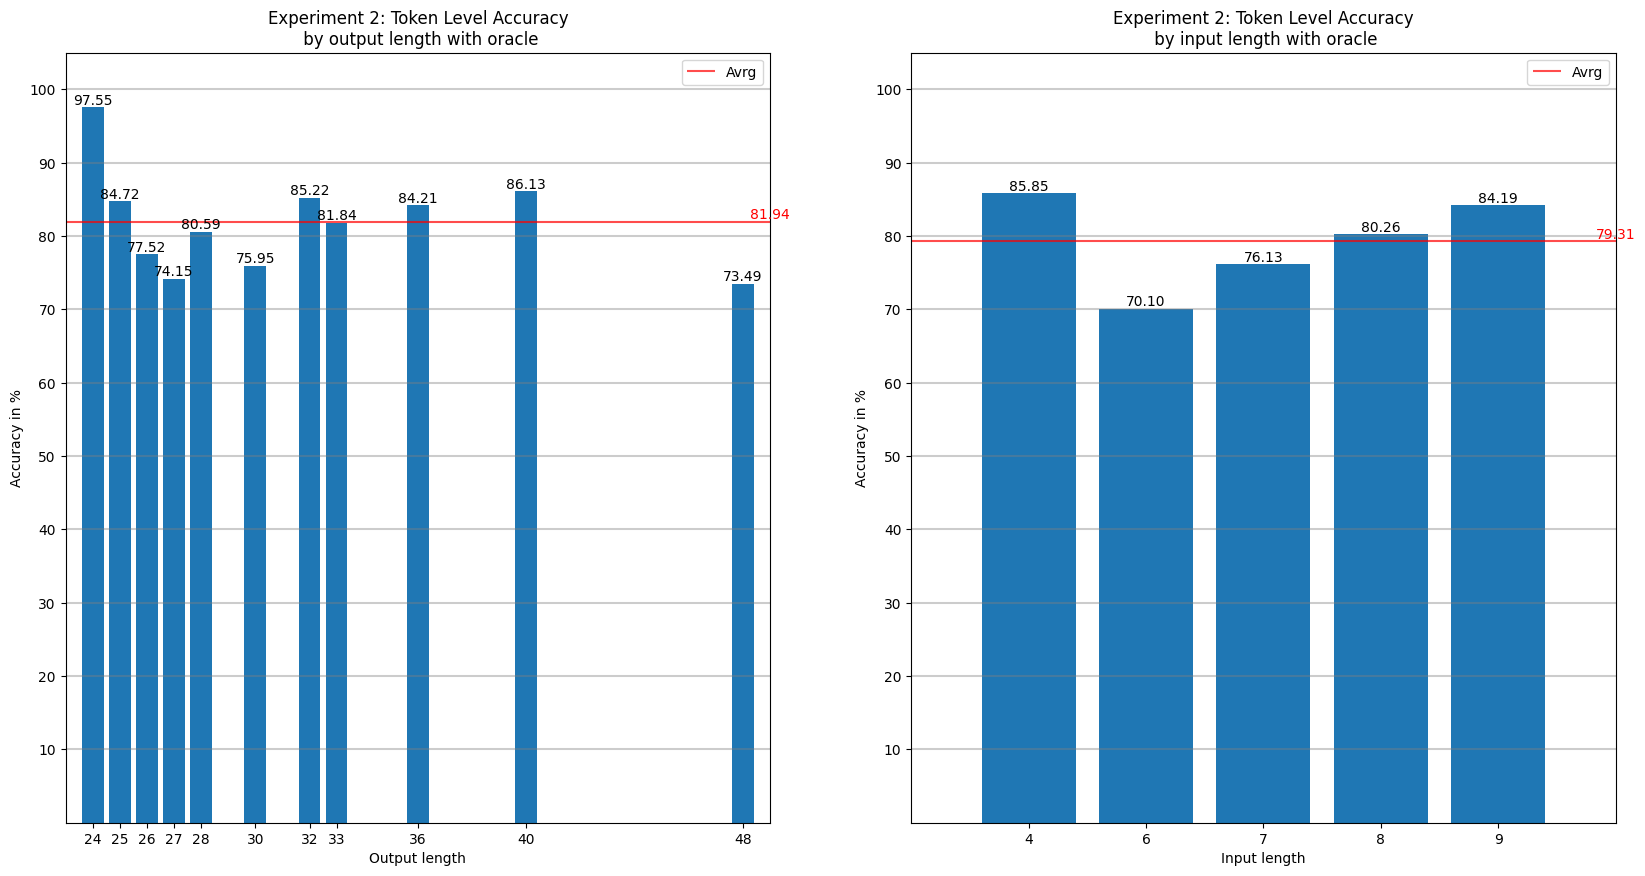

In [6]:

fig2, axs2 = plt.subplots(1, 2, figsize=(20, 10))

# ACC TL ORACLE OUTLEN
acc_tl_orac_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.ORACLE,
        ])
data:Metric = (E2*100).get_data(acc_tl_orac_outlen)[0]
mk_bar_plot(axs2[0],data=data, cut_trailing_zeros=True, omit_zero_lbls=True)
axs2[0].set_title("Experiment 2: Token Level Accuracy\n by output length with oracle")
axs2[0].set_ylabel("Accuracy in %")
axs2[0].set_xlabel("Output length")
axs2[0].legend()



# ACC TL ORACLE INLEN
acc_tl_orac_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

# TOTAL TL ORACLE INLEN
# used for removing empty bars in plots
tot_tl_orac_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

data:Metric = (E2*100).get_data(acc_tl_orac_inlen)[0]
total:Metric = E2.get_data(tot_tl_orac_inlen)[0]
mk_bar_plt_omit_empty(axs2[1],data_metric=data,total_metric=total, cut_trailing_zeros=True)
axs2[1].set_title("Experiment 2: Token Level Accuracy\n by input length with oracle")
axs2[1].set_ylabel("Accuracy in %")
axs2[1].set_xlabel("Input length")
axs2[1].legend()





### Sequence Level With Oracle

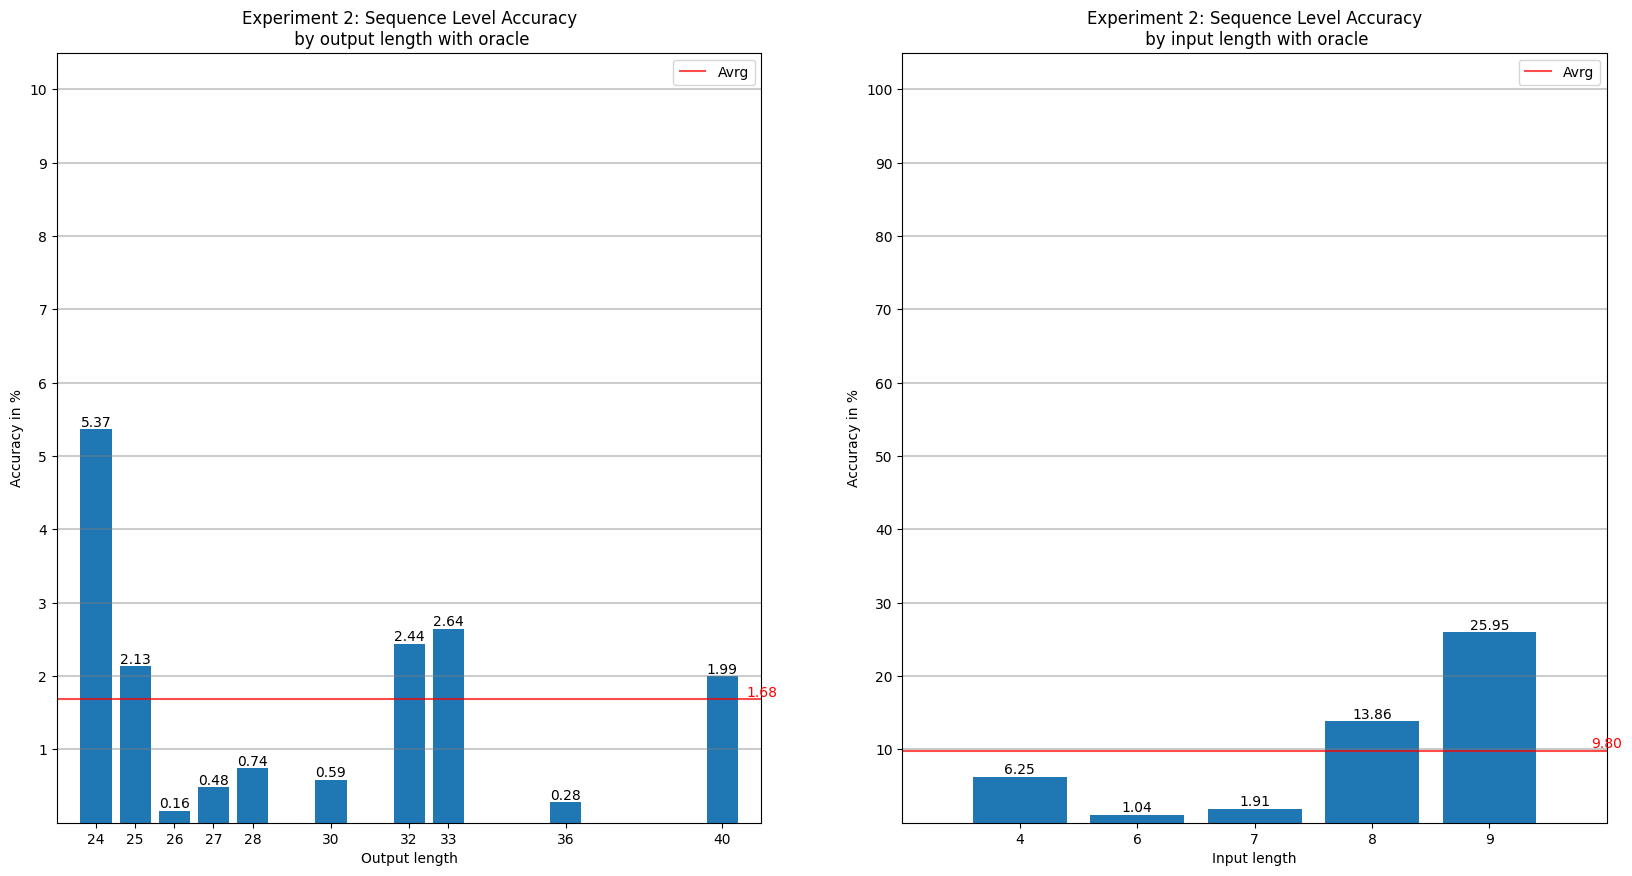

In [7]:
fig3, axs3 = plt.subplots(1, 2, figsize=(20, 10))

# ACC SL ORACLE OUTLEN
acc_sl_orac_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.ORACLE,
        ])
data:Metric = (E2*100).get_data(acc_sl_orac_outlen)[0]
mk_bar_plot(axs3[0],data=data, cut_trailing_zeros=True, omit_zero_lbls=True)
axs3[0].set_title("Experiment 2: Sequence Level Accuracy\n by output length with oracle")
axs3[0].set_ylabel("Accuracy in %")
axs3[0].set_xlabel("Output length")
axs3[0].legend()



# ACC SL ORACLE INLEN
acc_sl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

# TOTAL SL ORACLE INLEN
# used for removing empty bars in plots
tot_sl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

data:Metric = (E2*100).get_data(acc_sl_inlen)[0]
total:Metric = E2.get_data(tot_sl_inlen)[0]
mk_bar_plt_omit_empty(axs3[1],data_metric=data,total_metric=total, cut_trailing_zeros=True)
axs3[1].set_title("Experiment 2: Sequence Level Accuracy\n by input length with oracle")
axs3[1].set_ylabel("Accuracy in %")
axs3[1].set_xlabel("Input length")
axs3[1].legend()


### Experiment 3


In [8]:
E3_3 = EvaluationResultContainer.from_json("saved_data/eval_results/merged/E3_3.json")
E3_2 = EvaluationResultContainer.from_json("saved_data/eval_results/merged/E3_2.json")
E3_1 = EvaluationResultContainer.from_json("saved_data/eval_results/merged/E3_1.json")

E3_1 = np.mean(E3_1, axis=0)
E3_2 = np.mean(E3_2, axis=0)
E3_3 = aggregate_by_exp_type(E3_3)

E3_3.sort_by_exp_types()
# split into sublists of 5 repetitions of each sub experiment
sub_exprs:list[EvaluationResultContainer]= [E3_3[i*5:(i+1)*5] for i in range(len(E3_3)//5)]

import numpy as np
# avrg over repetitions
E3_3_avrg = EvaluationResultContainer(np.mean(sub_exprs, axis=1))



Text(0.5, 0, 'Number of composed commands used for training')

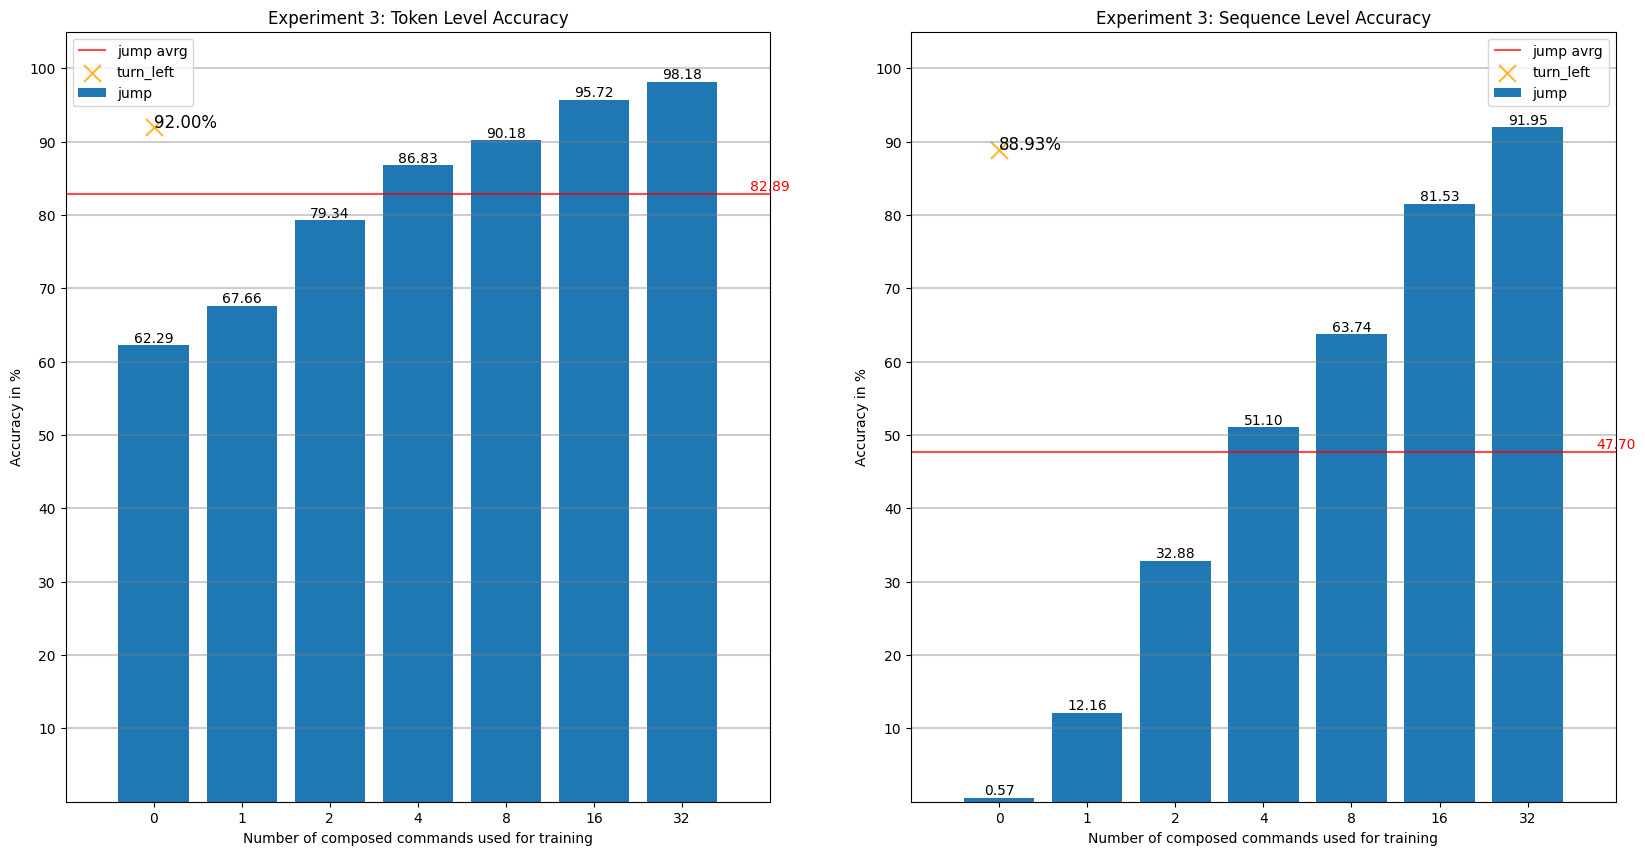

In [9]:
E3_3_data = (E3_3_avrg*100).get_data(acc_tl_avrg)
E3_2_data = (E3_2*100).get_data(acc_tl_avrg)
E3_23_data = E3_2_data + E3_3_data
E_23_x_lbls = ['0','1','2','4','8','16','32']

f3_3, axs3 = plt.subplots(1, 2, figsize=(20, 10))
mk_bar_plot(axs3[0], E3_23_data, x_lbls=E_23_x_lbls)
turn_left = E3_1.get_data(acc_tl_avrg)[0].val*100
axs3[0].scatter(x = 0, y = turn_left, label="turn_left", color='orange', marker='x',s=150,alpha=0.8)
axs3[0].text(0, turn_left, f"{turn_left:.2f}%", ha='left', fontdict = {'size': 12})
# add legend for first actor
axs3[0].legend(["","","jump", "turn_left"])
arts = axs3[0].get_legend().legend_handles
axs3[0].legend(arts[1:], ["jump avrg","turn_left", "jump"])
axs3[0].set_title("Experiment 3: Token Level Accuracy")
axs3[0].set_ylabel("Accuracy in %")
axs3[0].set_xlabel("Number of composed commands used for training")



#SL ACC AVRG NO_ORACLE
acc_sl_avrg = MetricTemplate(flags=[
    Flags.LevelFlags.SL,
    Flags.MetricFlags.ACC,
    Flags.DistrFlags.Avrg,
    Flags.PredictionFlags.NO_ORACLE,
])

E3_3_data = (E3_3_avrg*100).get_data(acc_sl_avrg)
E3_2_data = (E3_2*100).get_data(acc_sl_avrg)
E3_23_data = E3_2_data + E3_3_data
E_23_x_lbls = ['0','1','2','4','8','16','32']

mk_bar_plot(axs3[1], E3_23_data, x_lbls=E_23_x_lbls)

turn_left = E3_1.get_data(acc_sl_avrg)[0].val*100
axs3[1].scatter(x = 0, y = turn_left, label="turn_left", color='orange', marker='x',s=150,alpha=0.8)
axs3[1].text(0, turn_left, f"{turn_left:.2f}%", ha='left', fontdict = {'size': 12})
# add legend for first actor
axs3[1].legend(["","","jump", "turn_left"])
arts = axs3[1].get_legend().legend_handles
axs3[1].legend(arts[1:], ["jump avrg","turn_left", "jump"])
axs3[1].set_title("Experiment 3: Sequence Level Accuracy")
axs3[1].set_ylabel("Accuracy in %")
axs3[1].set_xlabel("Number of composed commands used for training")
